In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load the Dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [2]:

# Display the structure of the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification     

In [2]:

# Step 2: Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])



Missing Values:
Series([], dtype: int64)


In [3]:

# Step 3: Data Types and Encoding
# Encode the Target column
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

# Display the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping for Target Column:")
print(label_mapping)



Label Mapping for Target Column:
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [4]:
# Step 4: Data Splitting
# Define features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nTraining and Testing Set Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Testing Set Shapes:
X_train: (3539, 36), X_test: (885, 36)
y_train: (3539,), y_test: (885,)


In [5]:

# Step 5: Normalization/Scaling
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features in training and testing sets
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled training data
print("\nFirst Few Rows of Scaled Training Data:")
print(X_train.head())


First Few Rows of Scaled Training Data:
      Marital status  Application mode  Application order    Course  \
3383        4.769153         -0.673479          -0.557496  0.148321   
2840       -0.294763          1.161571          -0.557496  0.118740   
564        -0.294763         -1.017551           3.236694  0.111583   
1786        1.393209          1.161571          -0.557496  0.191738   
3900       -0.294763         -1.017551           0.960180  0.316742   

      Daytime/evening attendance\t  Previous qualification  \
3383                       0.35848               -0.145019   
2840                       0.35848               -0.343865   
564                        0.35848                0.153250   
1786                       0.35848                1.445751   
3900                       0.35848               -0.343865   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
3383                       -0.200135    -0.125267               -0.023118   
2840 

C:\Users\oruga\AppData\Local\Temp\ipykernel_25356\3313953573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='viridis')  # Create a count plot for the target variable


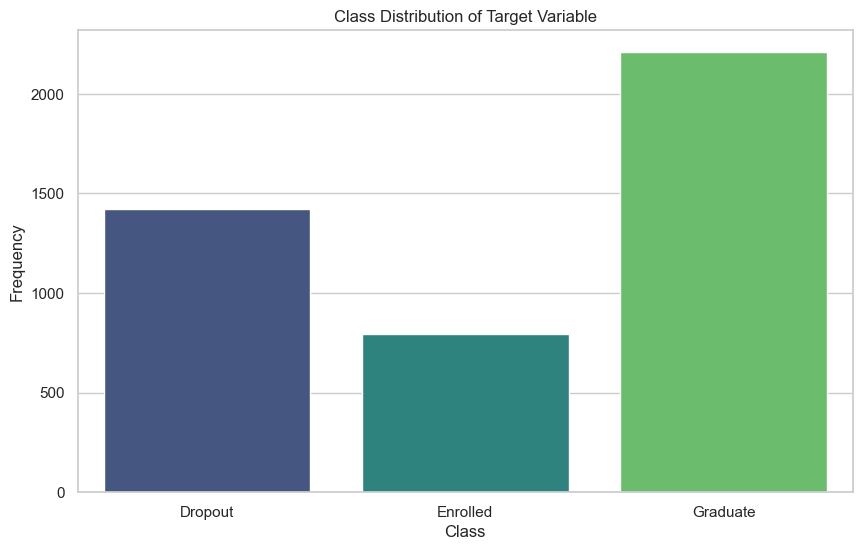

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn to whitegrid
sns.set(style="whitegrid")

# Step 1: Plot the distribution of the target classes
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.countplot(x='Target', data=data, palette='viridis')  # Create a count plot for the target variable
plt.title('Class Distribution of Target Variable')  # Set the title of the plot
plt.xlabel('Class')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])  # Set the x-axis tick labels
plt.show()  # Display the plot


C:\Users\oruga\AppData\Local\Temp\ipykernel_25356\3695900924.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='viridis')  # Create a histogram with KDE
C:\Users\oruga\AppData\Local\Temp\ipykernel_25356\3695900924.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='viridis')  # Create a histogram with KDE
C:\Users\oruga\AppData\Local\Temp\ipykernel_25356\3695900924.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='viridis')  # Create a histogram with KDE
C:\Users\oruga\AppData\Local\Temp\ipykernel_25356\3695900924.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='viridis')  # Create a histogram with KDE


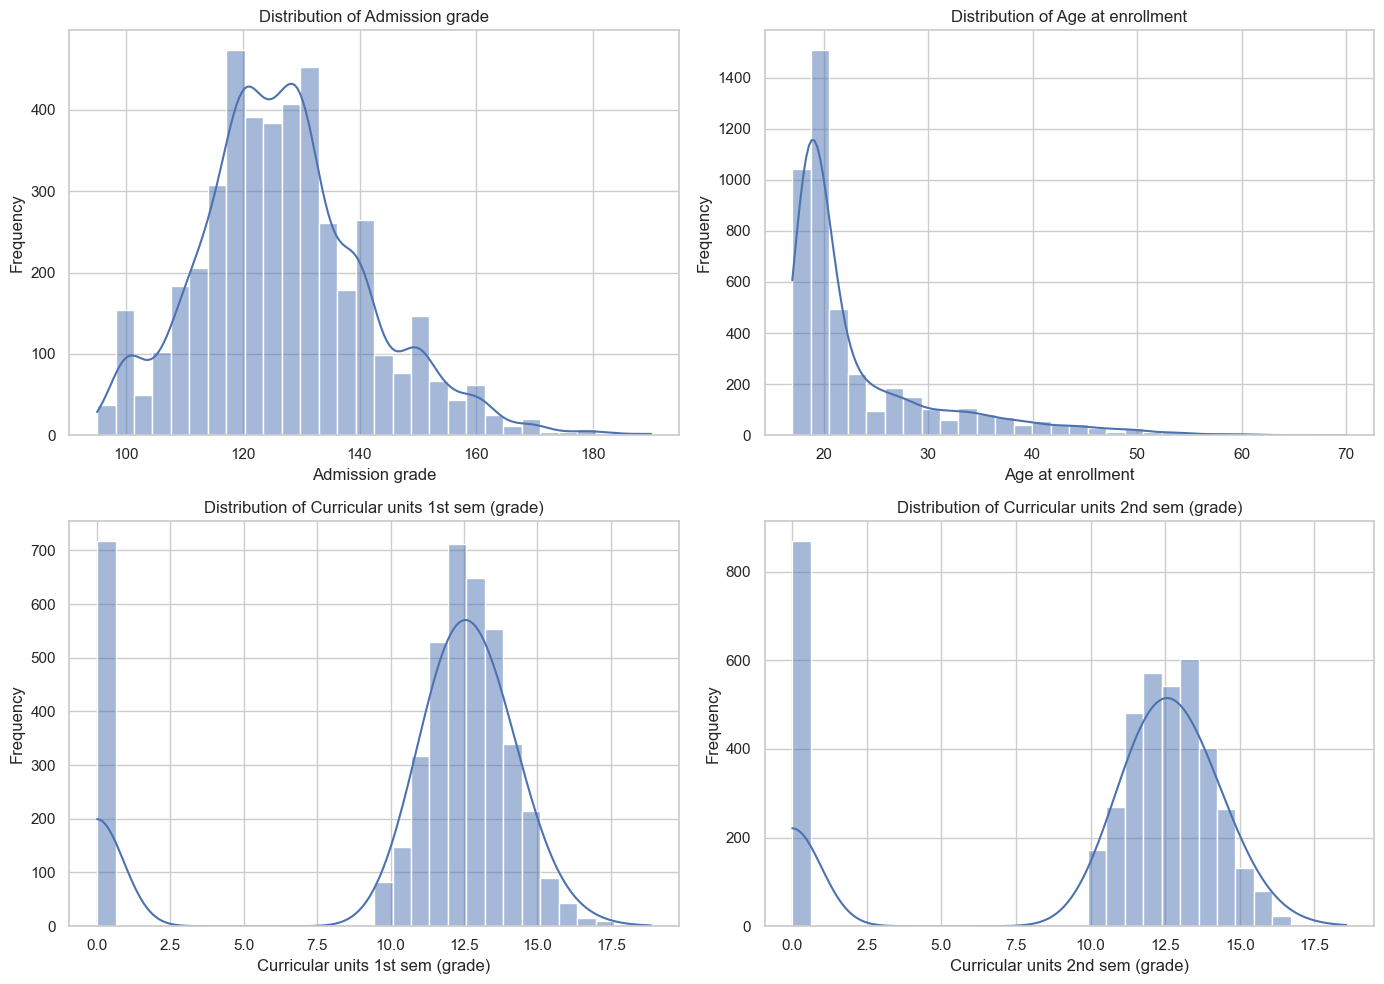

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features_to_plot = [
    'Admission grade', 
    'Age at enrollment', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)'
]

plt.figure(figsize=(14, 10))  # Set the figure size for the plots

# Loop through the list of features and create a subplot for each
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.histplot(data[feature], kde=True, bins=30, palette='viridis')  # Create a histogram with KDE
    plt.title(f'Distribution of {feature}')  # Set the title for each subplot
    plt.xlabel(feature)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the plots


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\oruga\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


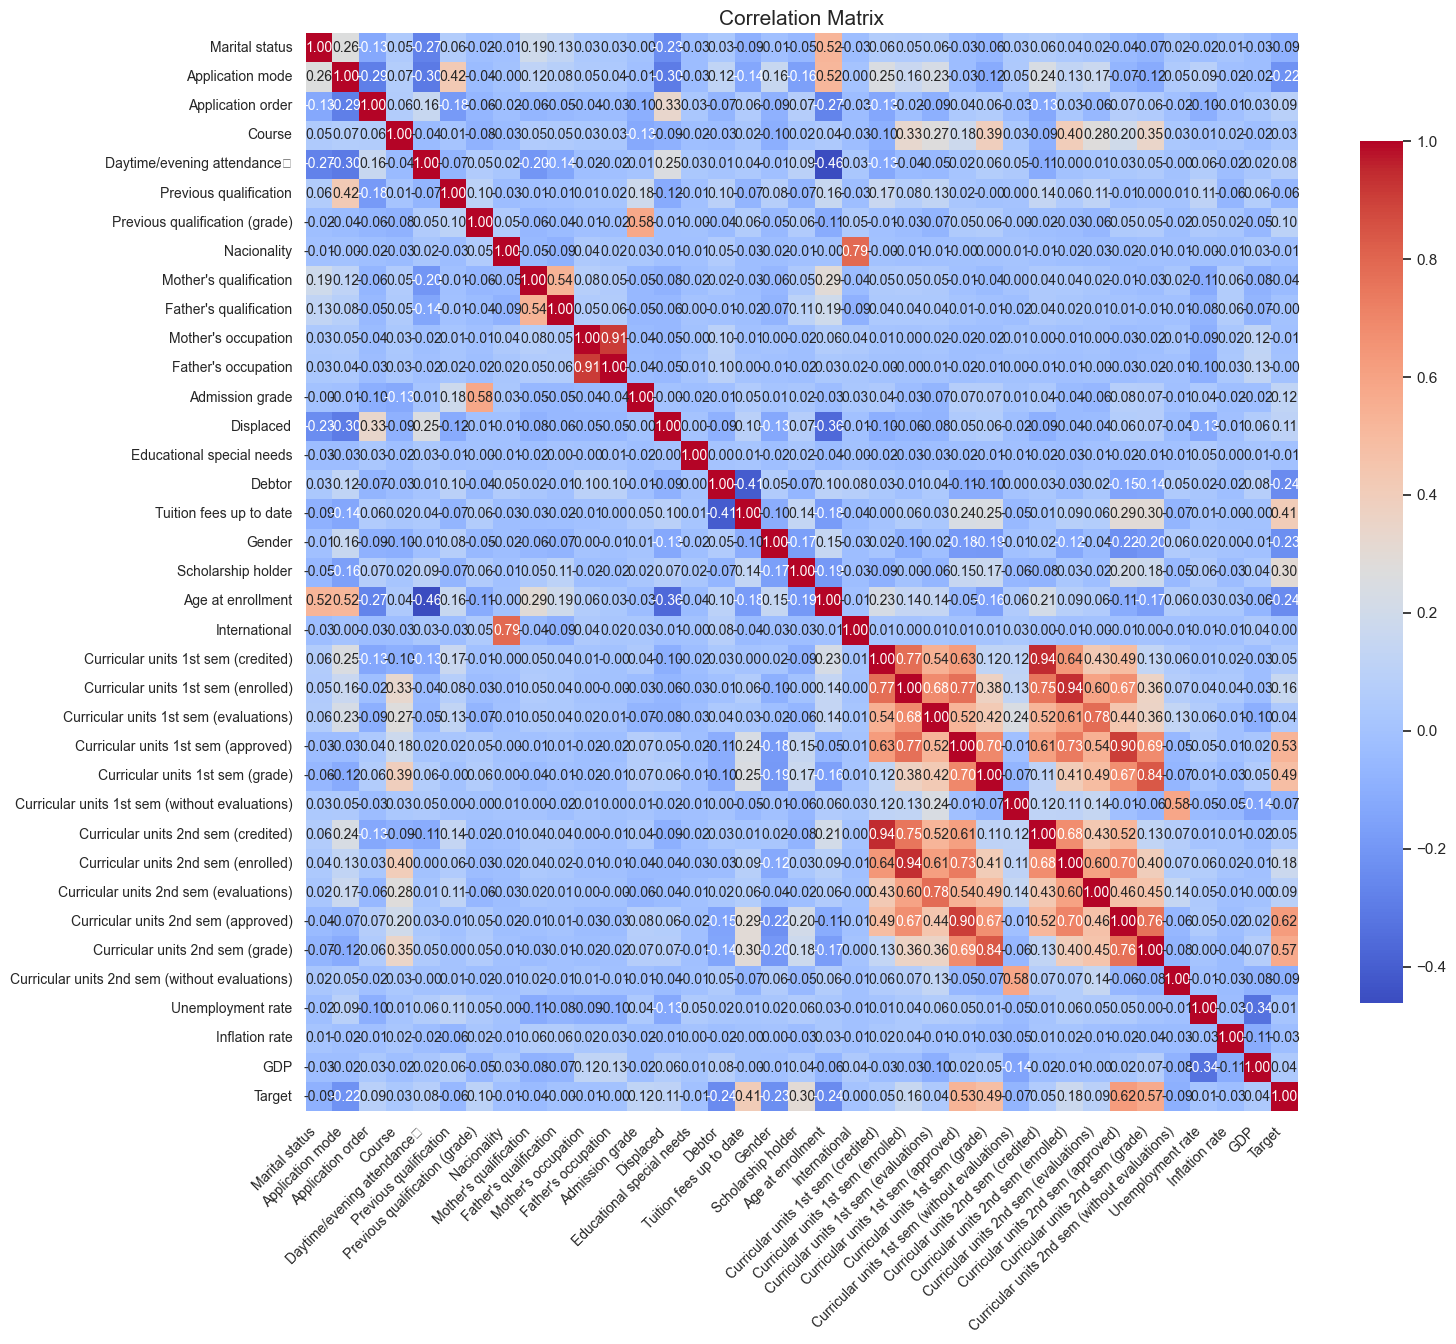

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix with increased figure size and better readability
plt.figure(figsize=(16, 14))  # Set the figure size for the plot
correlation_matrix = data.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})  # Create a heatmap
plt.title('Correlation Matrix', size=15)  # Set the title of the plot
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Set the y-axis label font size
plt.show()  # Display the plot


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Target'])  # Features are all columns except the target
y = data['Target']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((3539, 36), (885, 36), (3539,), (885,))

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features in training and testing sets
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled training data
print("\nFirst Few Rows of Scaled Training Data:")
print(X_train.head())



First Few Rows of Scaled Training Data:
      Marital status  Application mode  Application order    Course  \
2283        -0.29202          1.392028          -0.556229  0.185979   
3874        -0.29202          1.163255          -0.556229  0.134079   
2281        -0.29202          1.449221          -0.556229  0.073050   
817         -0.29202         -0.152186          -0.556229  0.105246   
404         -0.29202         -0.094993          -0.556229  0.311882   

      Daytime/evening attendance\t  Previous qualification  \
2283                      0.347852                3.286048   
3874                      0.347852               -0.355393   
2281                      0.347852                3.286048   
817                       0.347852               -0.355393   
404                       0.347852               -0.355393   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
2283                       -0.960935    -0.122435               -1.121950   
3874 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_report = classification_report(y_test, y_pred_logreg, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Logistic Regression Report:")
print(logreg_report)



Logistic Regression Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.68      0.76       284
    Enrolled       0.41      0.64      0.50       159
    Graduate       0.86      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.77      0.73      0.74       885



In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model with class weights
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
tree_report = classification_report(y_test, y_pred_tree, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Decision Tree Report:")
print(tree_report)


Decision Tree Report:
              precision    recall  f1-score   support

     Dropout       0.68      0.64      0.66       284
    Enrolled       0.36      0.43      0.39       159
    Graduate       0.78      0.75      0.76       442

    accuracy                           0.66       885
   macro avg       0.60      0.61      0.60       885
weighted avg       0.67      0.66      0.66       885



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model with class weights
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the model
forest_report = classification_report(y_test, y_pred_forest, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Random Forest Report:")
print(forest_report)


Random Forest Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.78       284
    Enrolled       0.59      0.38      0.46       159
    Graduate       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.78      0.76       885



In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
gb_report = classification_report(y_test, y_pred_gb, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Gradient Boosting Report:")
print(gb_report)


Gradient Boosting Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       284
    Enrolled       0.53      0.41      0.46       159
    Graduate       0.80      0.90      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 216 candidates, totalling 648 fits


({'bootstrap': True,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7739490039917003)

In [14]:
# Initialize the Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    class_weight='balanced',
    random_state=42
)

# Train the best model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best model
best_rf_report = classification_report(y_test, y_pred_best_rf, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Best Random Forest Report:")
print(best_rf_report)


Best Random Forest Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.78       284
    Enrolled       0.59      0.38      0.46       159
    Graduate       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.78      0.76       885



C:\Users\oruga\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


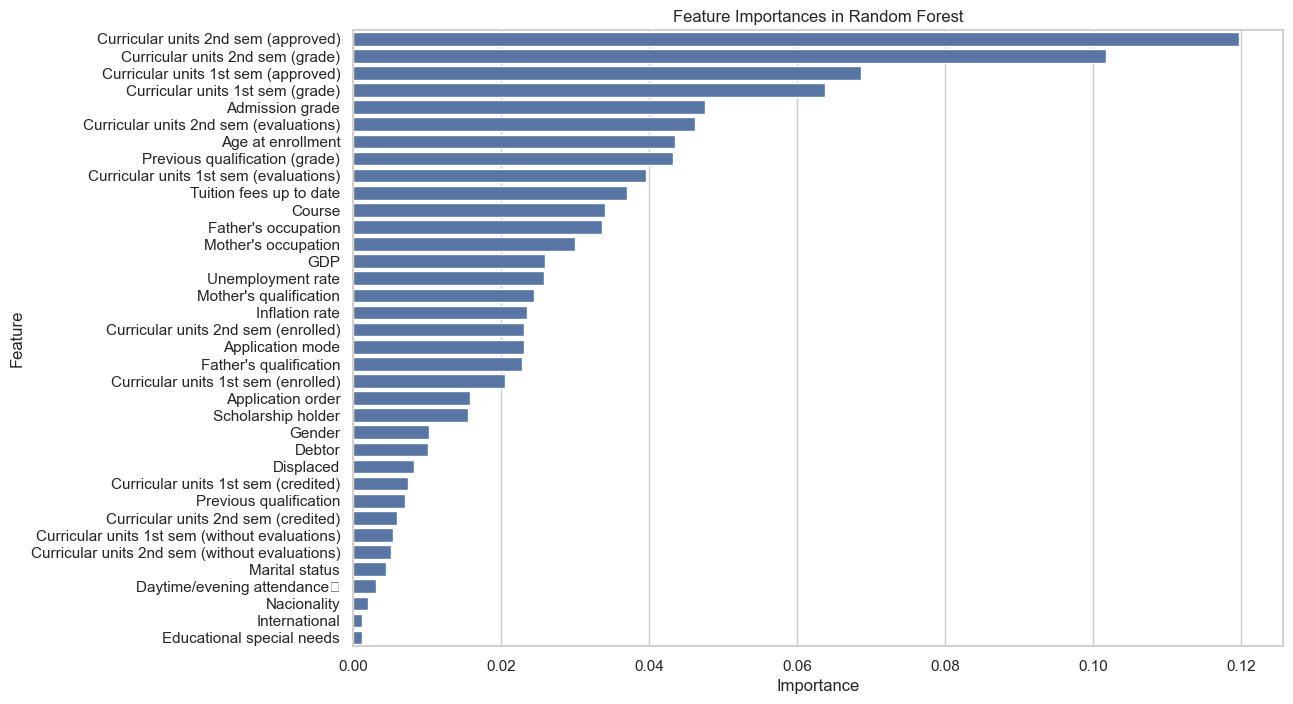

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from the best Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.77683616 0.78954802 0.78107345 0.79378531 0.76944837]
Mean cross-validation score: 0.7821382622523754


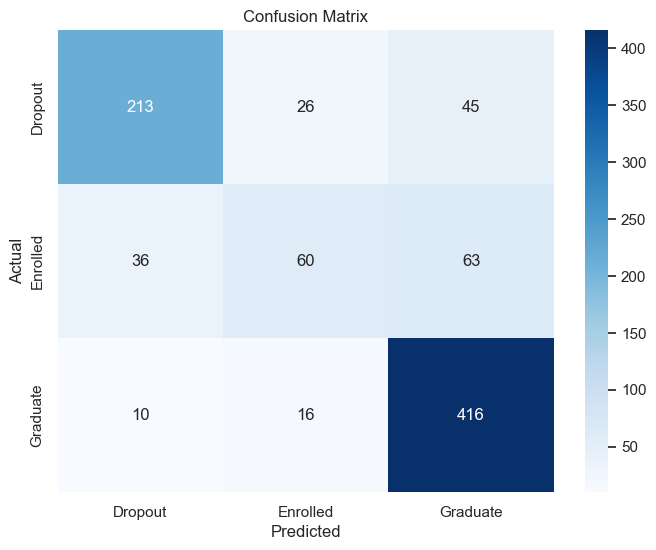

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


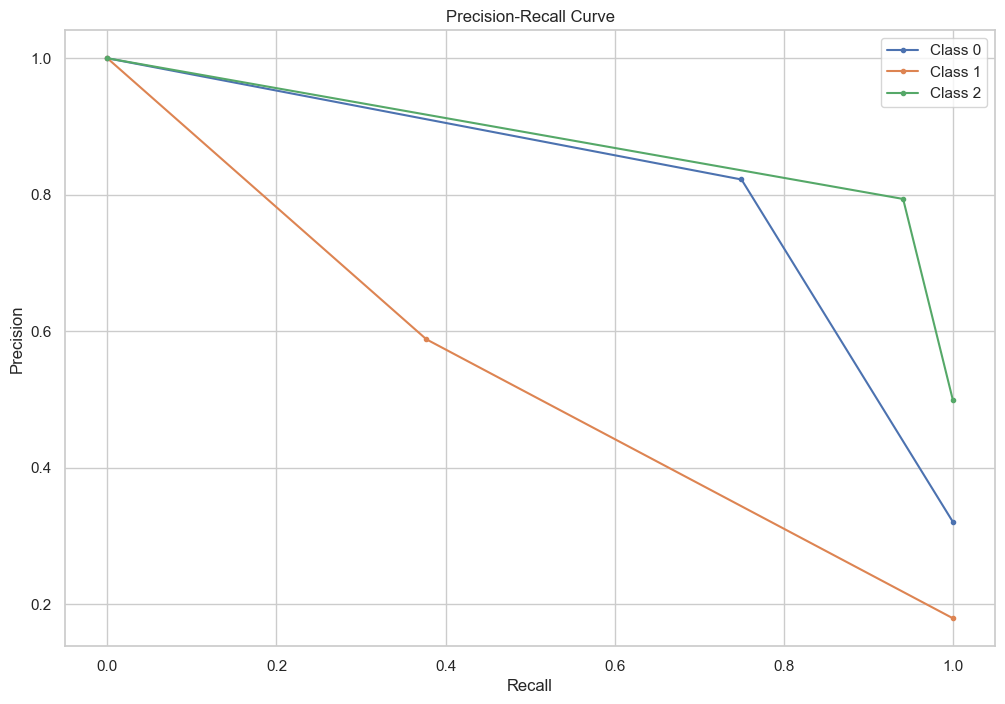

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute Precision-Recall and plot curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_best_rf == i)
    plt.plot(recall, precision, marker='.', label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


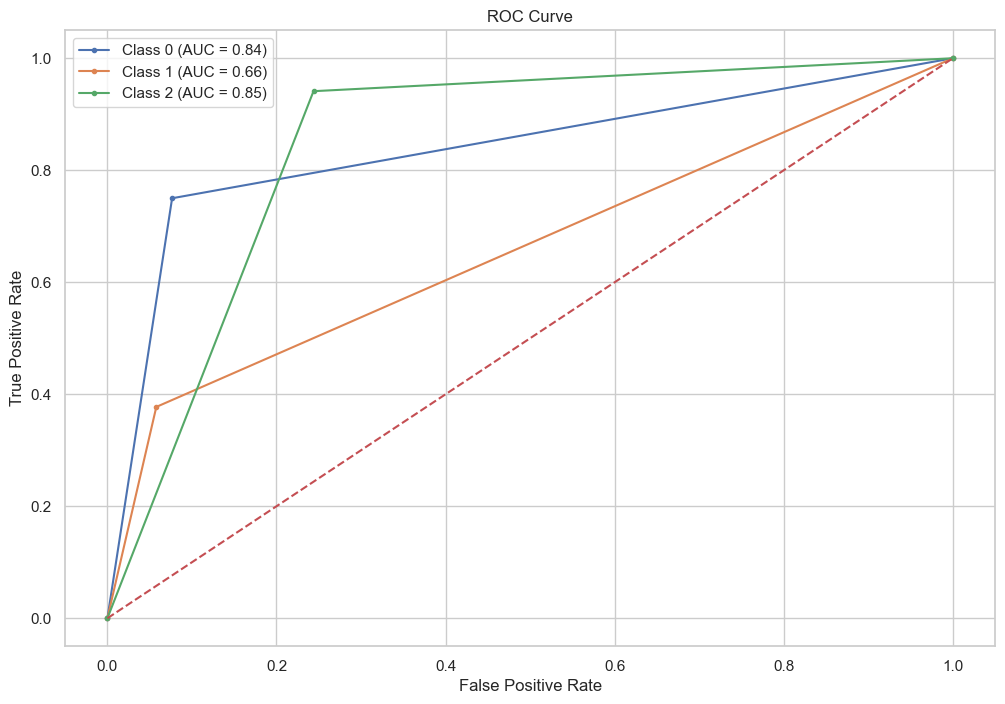

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_best_rf == i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a more comprehensive parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 960 candidates, totalling 2880 fits


({'bootstrap': True,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7739490039917003)

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define individual models
logreg = LogisticRegression(class_weight='balanced', random_state=42)
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Combine models into a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('tree', tree),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier
voting_report = classification_report(y_test, y_pred_voting, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Voting Classifier Report:")
print(voting_report)


Voting Classifier Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.51      0.50      0.51       159
    Graduate       0.82      0.87      0.85       442

    accuracy                           0.76       885
   macro avg       0.72      0.71      0.71       885
weighted avg       0.76      0.76      0.76       885



In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Define the best parameters obtained from RandomizedSearchCV
best_rf_params = {
    'bootstrap': False,
    'max_depth': 30,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 227,
    'class_weight': 'balanced',
    'random_state': 42
}

# Initialize and fit the Random Forest model with the best parameters
rf = RandomForestClassifier(**best_rf_params)
rf.fit(X_train, y_train)

# Use the fitted model for feature selection
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the Random Forest model on selected features
rf_selected = RandomForestClassifier(**best_rf_params)
rf_selected.fit(X_train_selected, y_train)

# Predict on the test set with selected features
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluate the model with selected features
selected_report = classification_report(y_test, y_pred_selected, target_names=['Dropout', 'Enrolled', 'Graduate'])
print("Random Forest with Selected Features Report:")
print(selected_report)


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Random Forest with Selected Features Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.72      0.76       284
    Enrolled       0.53      0.38      0.44       159
    Graduate       0.78      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 212}
Best Score: 0.7705586942875078


In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a model with the new features
model_poly = RandomForestClassifier(random_state=42)
model_poly.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = model_poly.predict(X_test_poly)
print(classification_report(y_test, y_pred_poly))



              precision    recall  f1-score   support

           0       0.80      0.75      0.77       284
           1       0.58      0.40      0.48       159
           2       0.80      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train the final model with the best parameters found
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)

final_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300)

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       316
    Enrolled       0.55      0.35      0.43       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885

Confusion Matrix:


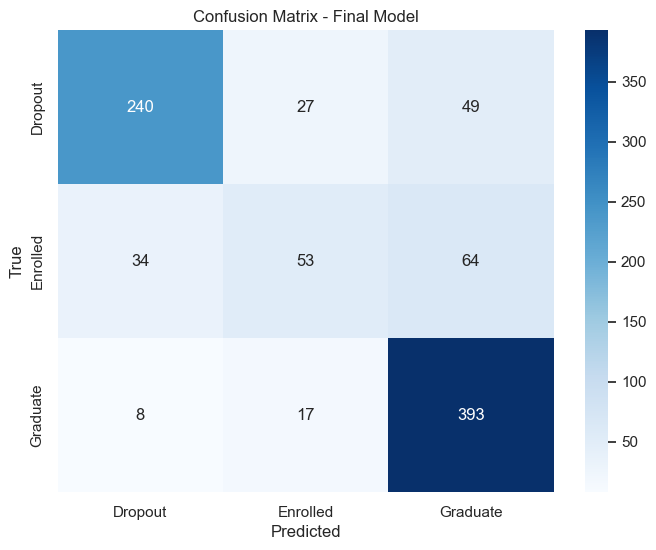

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model is trained
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Final Model')
plt.show()


C:\Users\oruga\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


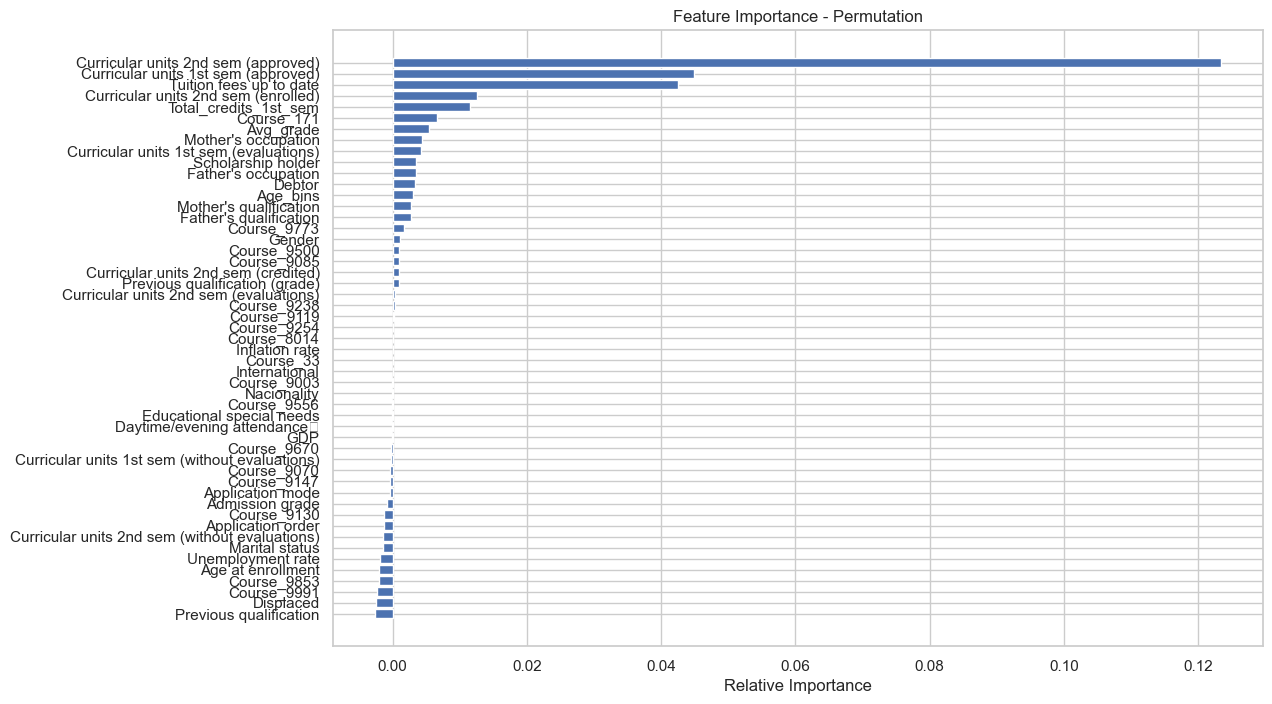

In [75]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Fit the final model again if needed
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)
final_model.fit(X_train, y_train)

# Compute permutation feature importance
perm_importance = permutation_importance(final_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get importance and sort them
importance = perm_importance.importances_mean
indices = np.argsort(importance)

# Plot
plt.figure(figsize=(12, 8))
plt.title('Feature Importance - Permutation')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [81]:
from sklearn.preprocessing import PolynomialFeatures

# Correct column names
features = ['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)', 'Admission grade']

# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Create polynomial features
poly_features = poly.fit_transform(df[features])

# Convert to DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features))

# Concatenate with the original dataset
df_poly = pd.concat([df, poly_df], axis=1)

# Display the updated DataFrame
df_poly.head()


,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Age_bins,Total_credits_1st_sem,Avg_grade,1,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),Admission grade,Curricular units 1st sem (evaluations) Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations) Admission grade,Curricular units 2nd sem (evaluations) Admission grade
0,1,17,5,1,1,122.0,1,19,12,5,...,1,0,0.000000,1.0,0.0,0.0,127.3,0.0,0.0,0.0
1,1,15,1,1,1,160.0,1,1,3,3,...,1,6,13.833333,1.0,6.0,6.0,142.5,36.0,855.0,855.0
2,1,1,5,1,1,122.0,1,37,37,9,...,1,6,0.000000,1.0,0.0,0.0,124.8,0.0,0.0,0.0
3,1,17,2,1,1,122.0,1,38,37,5,...,1,6,12.914286,1.0,8.0,10.0,119.6,80.0,956.8,1196.0
4,2,39,1,0,1,100.0,1,37,38,9,...,6,6,12.666667,1.0,9.0,6.0,141.5,54.0,1273.5,849.0


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.54      0.34      0.42       151
    Graduate       0.77      0.93      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:


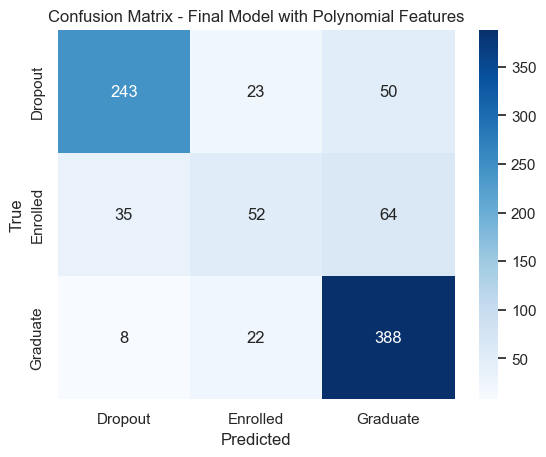

In [82]:
# Drop target column for training
X = df_poly.drop(columns=['Target'])
y = df_poly['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a new Random Forest model on the updated dataset
final_model_poly = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
final_model_poly.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = final_model_poly.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))

print("Confusion Matrix:")
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Final Model with Polynomial Features')
plt.show()


Feature ranking:
1. feature Curricular units 2nd sem (approved) (0.1356417773893516)
2. feature Avg_grade (0.09409118925008772)
3. feature Curricular units 1st sem (approved) (0.08595276821289653)
4. feature Tuition fees up to date (0.043950412336791596)
5. feature Curricular units 2nd sem (evaluations) Admission grade (0.03800149951128418)
6. feature Curricular units 1st sem (evaluations) Admission grade (0.03371137872644552)
7. feature Curricular units 1st sem (evaluations) Curricular units 2nd sem (evaluations) (0.03299828871022915)
8. feature Admission grade (0.031337753308513946)
9. feature Admission grade (0.031163287756853092)
10. feature Previous qualification (grade) (0.029762541442187724)
11. feature Age at enrollment (0.028257175611136064)
12. feature Father's occupation (0.023802128379439094)
13. feature Curricular units 2nd sem (evaluations) (0.0235249558357033)
14. feature Curricular units 2nd sem (evaluations) (0.023174025276882004)
15. feature Mother's occupation (0.021

C:\Users\oruga\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


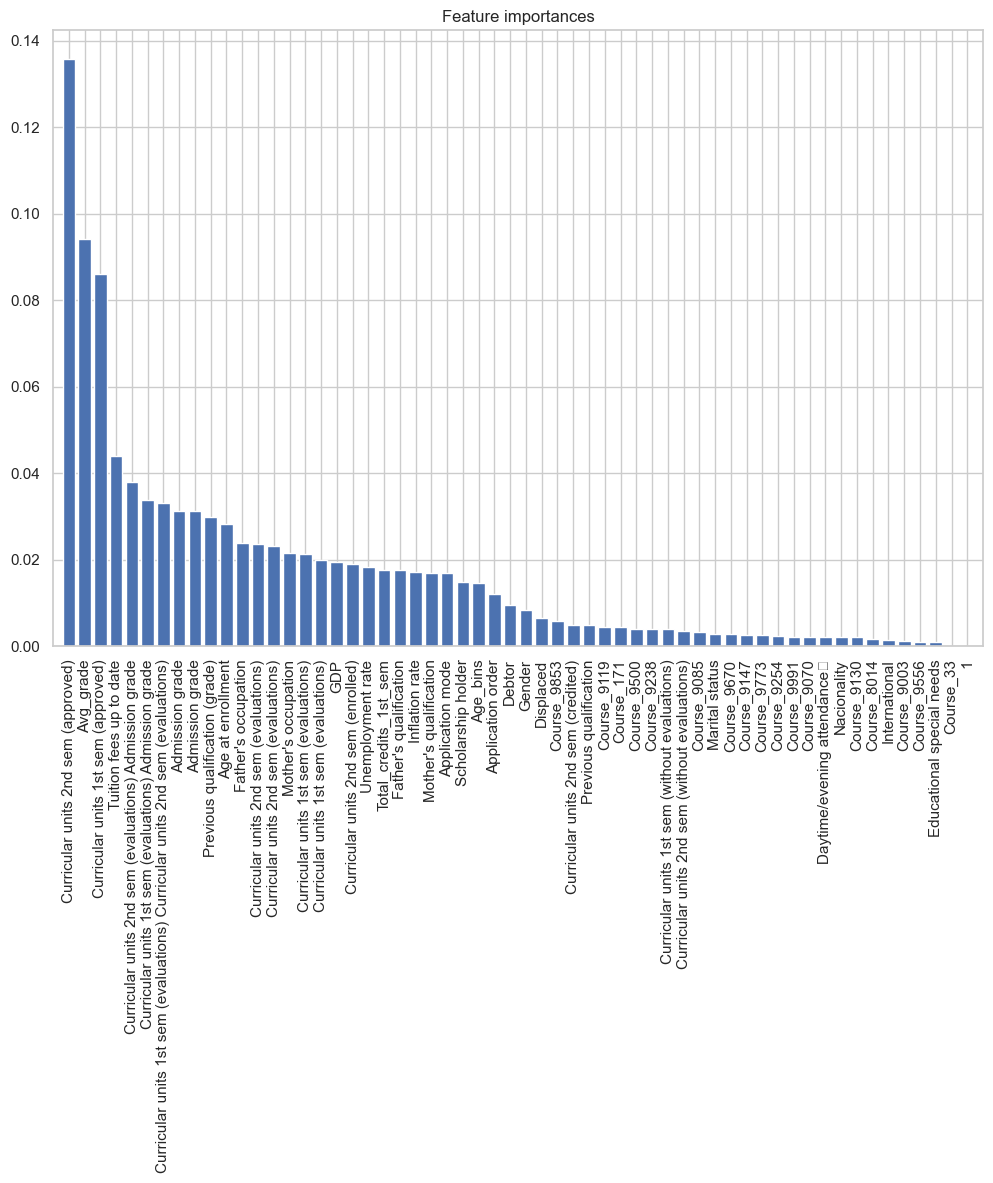

In [86]:
import numpy as np

importances = final_model_poly.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
